<a href="https://colab.research.google.com/github/senthilanan2016/CodSoft/blob/main/Task_1_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction:**


The Titanic Survival Prediction project focuses on building a predictive model using machine learning techniques. The goal is to predict whether a passenger survived the Titanic disaster based on various features available in the dataset.

### **Data Exploration and Preprocessing:**

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the Titanic Dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Task1/tested.csv")

# New Section

In [5]:
# Explore the Dataset:
# Display first five rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Get an overview of column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
#Checking for null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

###**Handle Missing Values**

Deal with missing data by either filling missing values or removing rows/columns with significant missing values.

In [8]:
# Fill missing age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [9]:
# Fill missing Fare values with the median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [10]:
# Drop the Column "Cabin"
df.drop(columns=["Cabin"], axis=1, inplace=True)

In [11]:
df.isnull().values.sum()

0

In [12]:
#Describing the Dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## **Data Visualization**

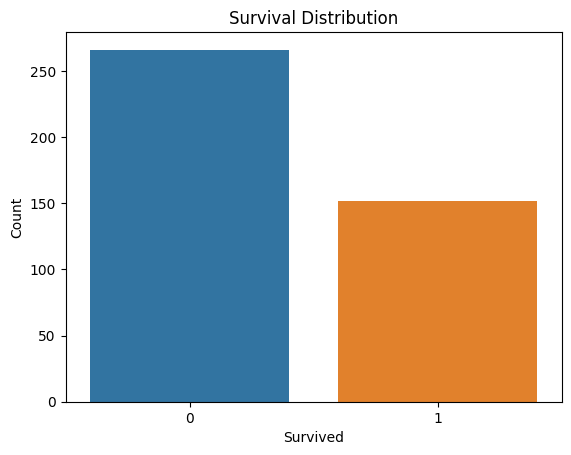

In [13]:
# Plot Survival Distribution using count plot
# 0-Not Survived , 1-Survived
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

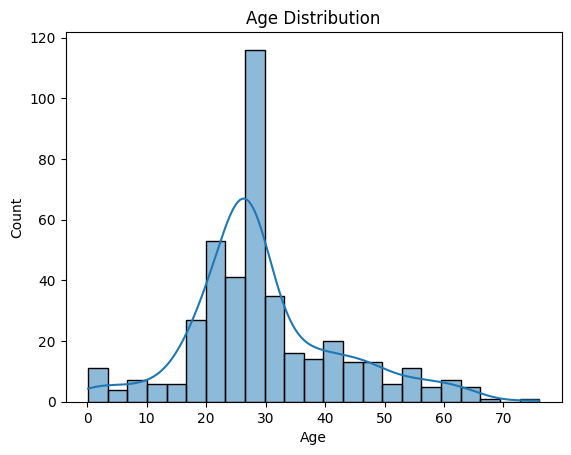

In [15]:
# Visualize the distribution of age using Histogram plots
sns.histplot(data=df, x='Age', kde=True)
plt.title("Age Distribution")
plt.show()

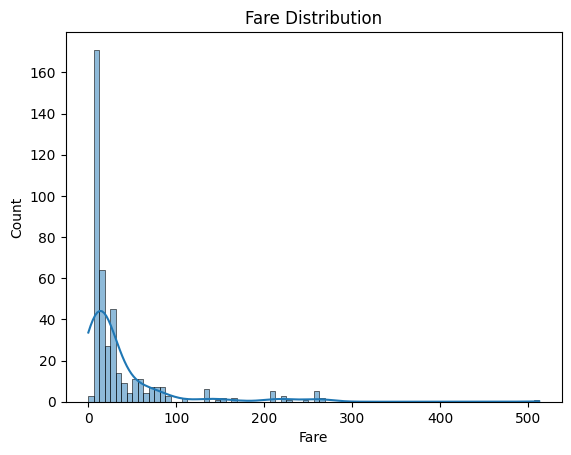

In [16]:
# Plot fare distribution using hist plot
sns.histplot(data=df, x='Fare', kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

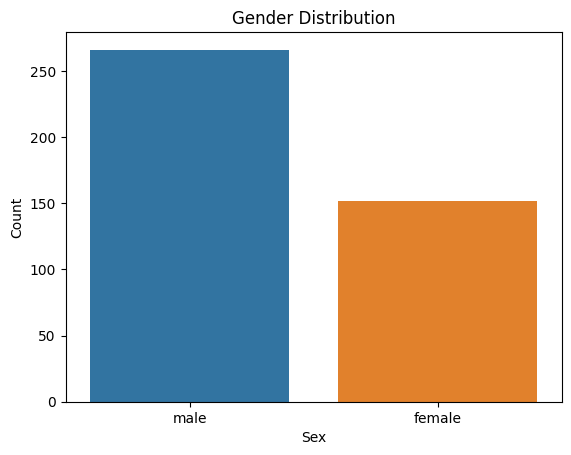

In [17]:
# Plot gender distribution
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

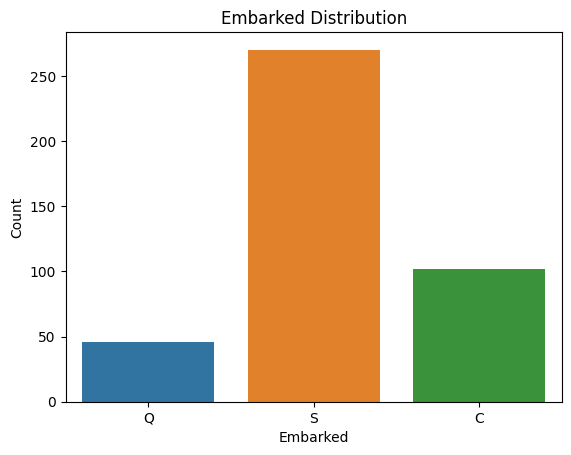

In [18]:
# Plot embarked distribution
# C-Cherbourg, Q-Queenstown, S-Southhampton
sns.countplot(x='Embarked', data=df)
plt.title("Embarked Distribution")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

In [19]:
#Grouping and Reshaping the data for Visulization
gender_survival = df.groupby(['Sex', 'Survived']).size().unstack()
gender_survival

Survived,0,1
Sex,,
female,NaN,152.0
male,266.0,NaN


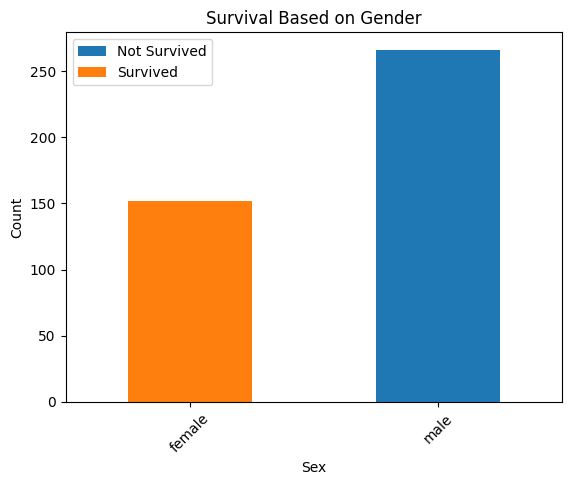

In [20]:
#Survival based on Gender by using Stacked Bar Plot
gender_survival.plot(kind='bar', stacked=True)
plt.title("Survival Based on Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(['Not Survived', 'Survived'])
plt.xticks(rotation=45)
plt.show()

**Feature Selection**


*   Create '**FamilySize**' Feature
*   Combine **'SibSp'   and 'Parch'** to create a new feature
representing family size.





In [21]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.FamilySize.head()

0    0
1    1
2    0
3    0
4    2
Name: FamilySize, dtype: int64

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2


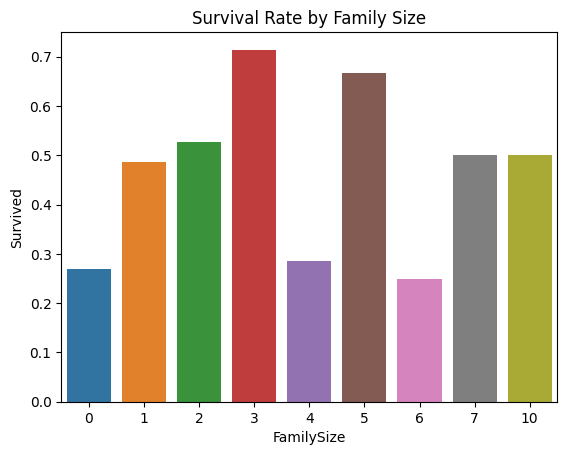

In [23]:
#Visualize survival based on family size by using bar plot

sns.barplot(x='FamilySize', y='Survived', data=df,errorbar=None)
plt.title("Survival Rate by Family Size")
plt.show()

## **Converting Categorical Features to Numeric**

In [24]:
# Mapping 'Embarked' values to numerical representations
df['Embarked'] = df['Embarked'].map({'Q': 0, 'S': 1, 'C': 2}).astype(int)

In [25]:
# Mapping 'Sex' values to numerical representations
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,0
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1,2


### **Drop Irrelevant Features:**

In [27]:
# Drop 'PassengerId', 'Name', 'Ticket', 'SibSp', and 'Parch'
df.drop(['PassengerId', 'Name', 'Ticket','SibSp', 'Parch' ], axis=1, inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,34.5,7.8292,0,0
1,1,3,1,47.0,7.0000,1,1
2,0,2,0,62.0,9.6875,0,0
3,0,3,0,27.0,8.6625,1,0
4,1,3,1,22.0,12.2875,1,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Sex         418 non-null    int64  
 3   Age         418 non-null    float64
 4   Fare        418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


## **Model Selection and Training:**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [32]:
# Splitting the features and Target
X = df.drop('Survived', axis=1)

In [33]:
Y = df['Survived']

In [34]:
# Splitting and training the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
# Train a Logistic Regression model
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)

LogisticRegression()

**Model Evaluation**

In [36]:
# Make predictions using test data
Y_test_pred = logreg.predict(X_test)
Y_test_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [37]:
# Calculate accuracy scores
accuracy_test_logreg = accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy:", round(accuracy_test_logreg)*100,'%' )

Test Accuracy: 100 %


In [38]:
# Make predictions using  train data
Y_train_pred = logreg.predict(X_train)
Y_train_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [39]:
accuracy_train_logreg = accuracy_score(Y_train, Y_train_pred)
print("Train Accuracy:", round(accuracy_train_logreg)*100,'%' )

Train Accuracy: 100 %


In [40]:
# Calculate confusion matrix by using test data
cf_matrix_test = confusion_matrix(Y_test, Y_test_pred)
print(cf_matrix_test)

[[51  0]
 [ 0 33]]


In [41]:
# Unpack confusion matrix elements
tn, fp, fn, tp = cf_matrix_test.ravel()

print(tn, fp, fn, tp)

51 0 0 33


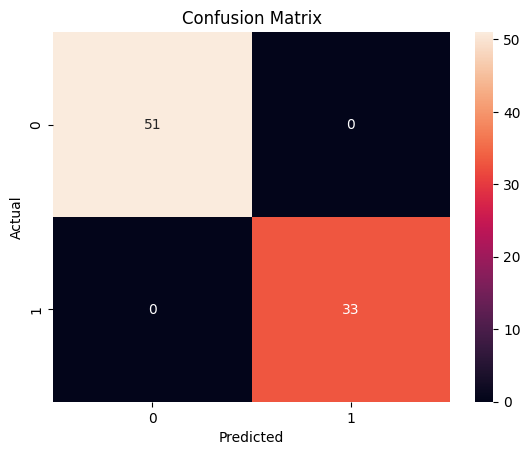

In [42]:
# Display confusion matrix as heatmap
sns.heatmap(cf_matrix_test, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
# Calculate confusion matrix by using test data
cf_matrix_train = confusion_matrix(Y_train, Y_train_pred)
print(cf_matrix_train)

[[215   0]
 [  0 119]]


In [44]:
# Unpack confusion matrix elements
tn, fp, fn, tp = cf_matrix_train.ravel()

print(tn, fp, fn, tp)

215 0 0 119


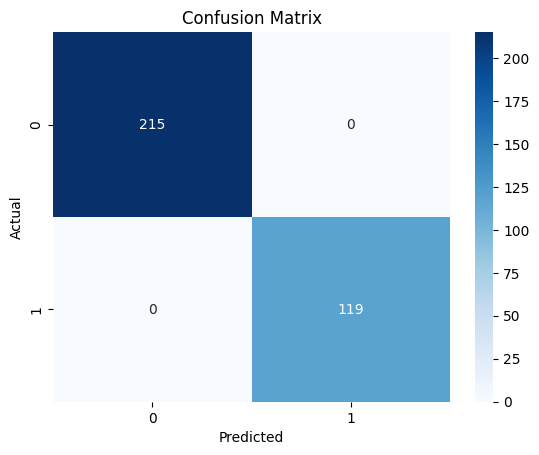

In [45]:
# Display confusion matrix as heatmap
sns.heatmap(cf_matrix_train, annot=True, fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:

# Define a function to calculate precision, recall, and F1-score
def precision_recall_f1_score(true_labels, pred_labels):
    precision_value = precision_score(true_labels, pred_labels)
    recall_value = recall_score(true_labels, pred_labels)
    f1_score_value = f1_score(true_labels, pred_labels)

    print('Precision =', round(precision_value)*100,'%')
    print('Recall =', round(recall_value)*100,'%')
    print('F1 Score =', round(f1_score_value)*100,'%')

In [47]:
# Classification metrics for training data
print("\nMetrics for Training Data:")
precision_recall_f1_score(Y_train, Y_train_pred)


Metrics for Training Data:
Precision = 100 %
Recall = 100 %
F1 Score = 100 %


In [48]:
# Classification metrics for testing data
print("\nMetrics for Testing Data:")
precision_recall_f1_score(Y_test, Y_test_pred)


Metrics for Testing Data:
Precision = 100 %
Recall = 100 %
F1 Score = 100 %


## **Building a Predictive System**

In [49]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,34.5,7.8292,0,0
1,1,3,1,47.0,7.0000,1,1
2,0,2,0,62.0,9.6875,0,0
3,0,3,0,27.0,8.6625,1,0
4,1,3,1,22.0,12.2875,1,2


In [50]:
# User input for predictive system
input_data = (	3,	1,	47.0,	7.0000,	1,	1)

In [51]:
# Change the input data to a numpy array
input_data_np_array = np.asarray(input_data)
input_data_np_array

array([ 3.,  1., 47.,  7.,  1.,  1.])

In [52]:
# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_np_array.reshape(1, -1)
input_data_reshaped

array([[ 3.,  1., 47.,  7.,  1.,  1.]])

In [53]:
# Make predictions using the trained model
input_data_reshaped_df = pd.DataFrame(input_data_reshaped, columns=X_train.columns)
prediction = logreg.predict(input_data_reshaped_df)
print(prediction)

[1]


In [54]:
# Display prediction result
if prediction[0] == 0:
  print("The passenger did not survive.")
else:
  print("The passenger survived.")

The passenger survived.


## Project Summary: Predicting Titanic Survival

Our Titanic Survival Prediction project has combined historical data and modern machine learning to uncover the fate of Titanic passengers. Using factors like age, gender, and fare as our guide, we've built models to predict survival outcomes. By visualizing data trends, we've learned more about who survived. This project is a bridge between history and technology, allowing us to predict what happened and remember those who were on the Titanic.